In [1]:
## Sport Vector Machine 

In [7]:
# we use tis for binaary classifiaction /but we will solve the problem by SVM 
# this is used same in logistic regression. 

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import r2_score

In [76]:
bank_data = pd.read_csv("Churn_Modelling.csv")
bank_data.head()

# this data we want bank employeee not to leave and give hi better offer as 
# per sorting the data . we going to sovle this problem by usifn SVM ( sport Vector Machine )

# SVM lies in a Supervised learning 
# and it is used in classifications dn regresion analysis . 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [77]:
# first we willvisualize the data with graph so to get more inforamtion . 

In [78]:
bank_data[bank_data['Exited']==1].sample(500)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1201,1202,15651052,McMasters,399,Germany,Male,46,2,127655.22,1,1,0,139994.68,1
6596,6597,15654531,Tuan,477,France,Male,22,5,82559.42,2,0,0,163112.90,1
3839,3840,15806230,Trevisano,629,Germany,Male,40,2,121647.54,2,1,1,64849.74,1
8931,8932,15761487,Yefimova,678,France,Female,55,5,0.00,1,0,1,196794.11,1
7506,7507,15700300,Okoli,674,Germany,Female,44,4,131593.85,1,0,1,171345.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2396,15672374,Pai,672,France,Male,52,8,170008.84,1,0,0,56407.42,1
339,340,15807923,Young,716,Germany,Female,39,10,115301.31,1,1,0,43527.40,1
4342,4343,15772412,Corser,554,Spain,Male,30,6,135370.12,1,1,1,179689.05,1
1010,1011,15799811,Herrera,724,France,Male,40,10,0.00,1,1,0,127847.25,1


In [79]:
# to make iit manually 

exited_counts = bank_data['Exited'].value_counts()
exited_counts 

Exited
0    7963
1    2037
Name: count, dtype: int64

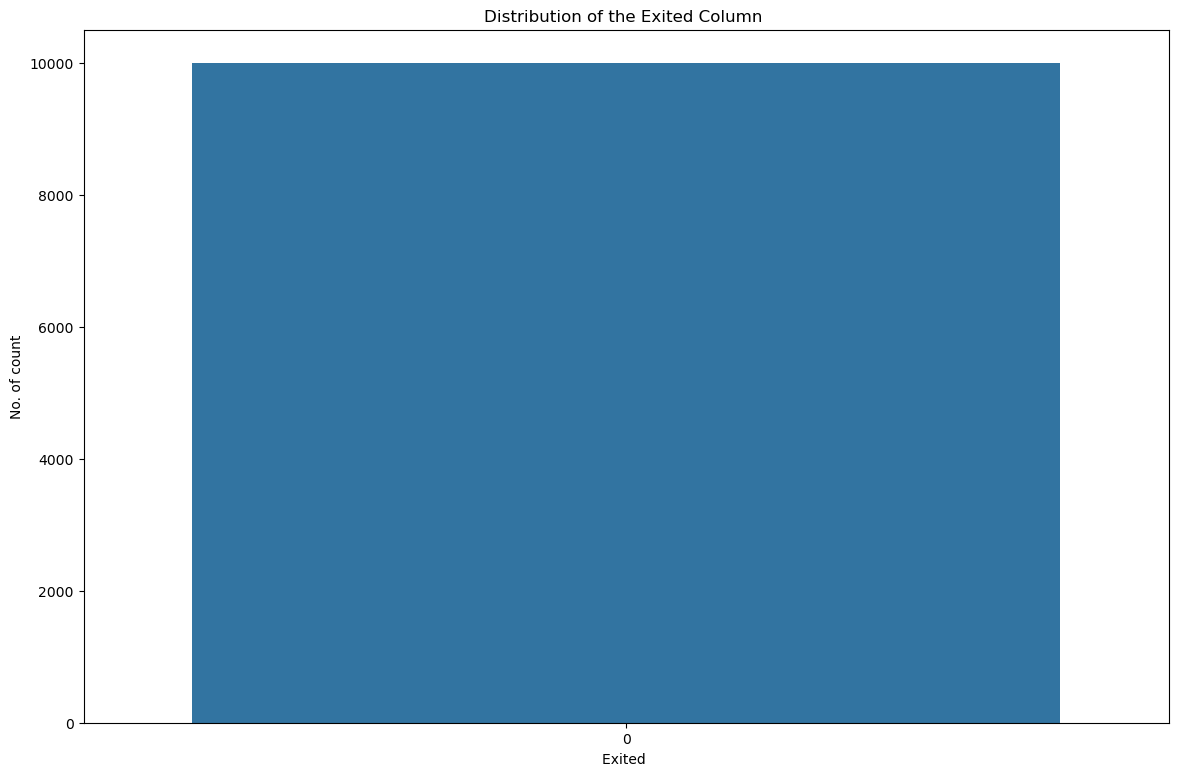

In [80]:
plt.figure(figsize=(14,9))
sns.countplot(bank_data['Exited'])
plt.xlabel("Exited ")
plt.ylabel('No. of count')
plt.title('Distribution of the Exited Column ')
plt.show()

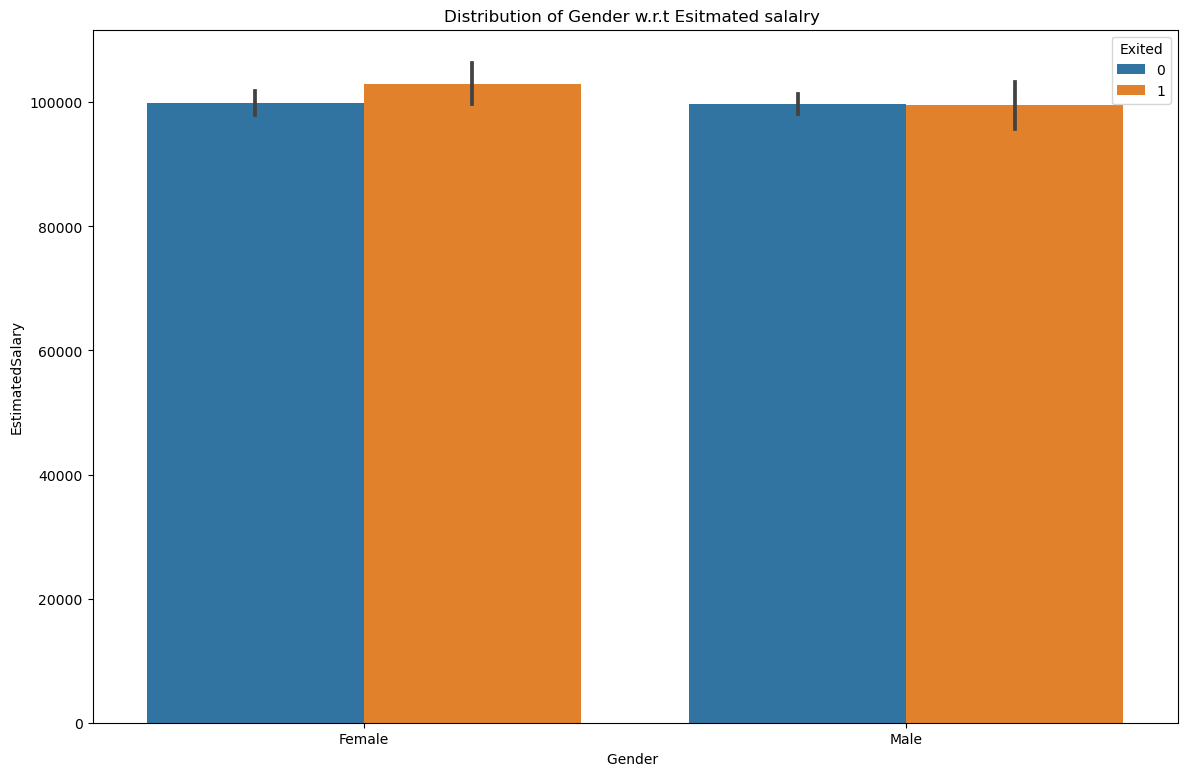

In [81]:
plt.figure(figsize=(14,9))
sns.barplot(data = bank_data, x= 'Gender' , y = 'EstimatedSalary' ,hue='Exited')
plt.xlabel("Gender ")
plt.ylabel('EstimatedSalary')
plt.title('Distribution of Gender w.r.t Esitmated salalry ')
plt.show()

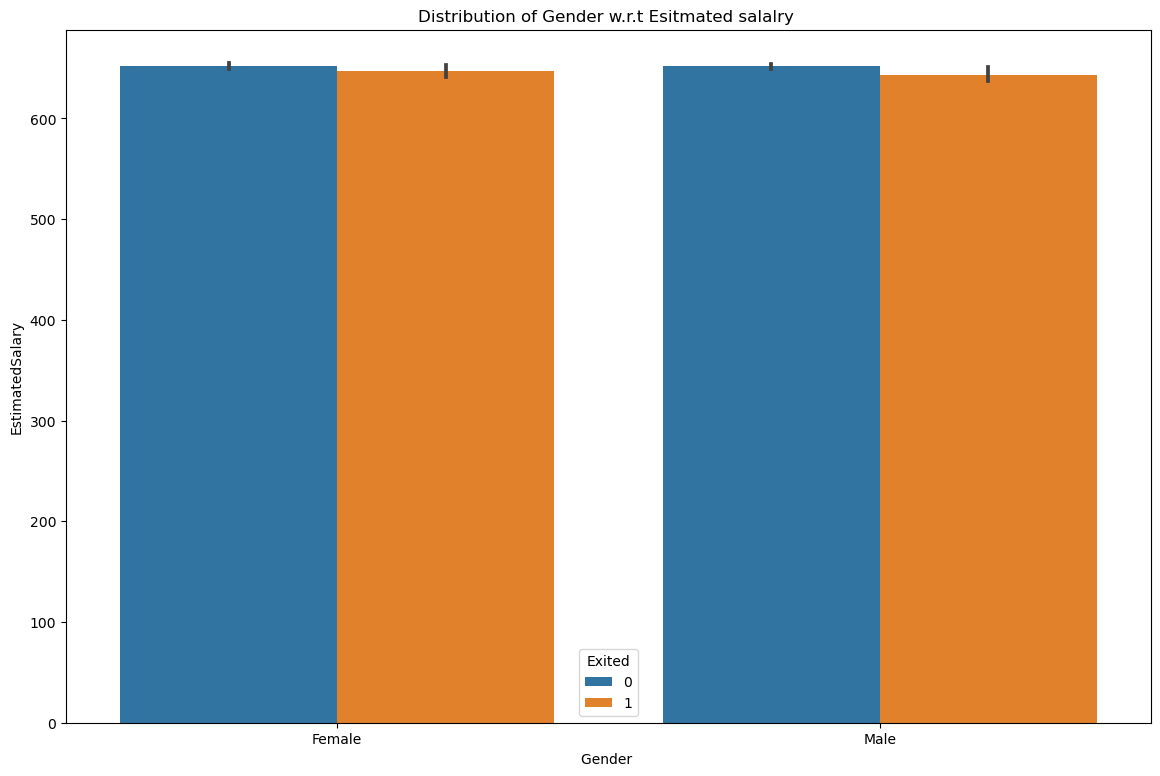

In [82]:
plt.figure(figsize=(14,9))
sns.barplot(data = bank_data, x= 'Gender' , y = 'CreditScore' ,hue='Exited')
plt.xlabel("Gender ")
plt.ylabel('EstimatedSalary')
plt.title('Distribution of Gender w.r.t Esitmated salalry ')
plt.show()

In [83]:
# now with the help of visiualtion we are not able tto find any excat reason so 
# that why we are goign to use the machine learning conpet to further figure it out 

# Encoder Data

# Applying Label Encoding

In [84]:
bank_data['Gender'] = bank_data['Gender'].map({'Male':0,'Female':1})

# Applying One Hot Encoding 

In [85]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()

In [86]:
one_hot_encoder.fit(bank_data[['Geography']])

OneHotEncoder()

In [87]:
temp = one_hot_encoder.transform(bank_data[['Geography']]).toarray()

In [88]:
one_hot_encoder.categories_

[array(['France', 'Germany', 'Spain'], dtype=object)]

In [89]:
temp_data = pd.DataFrame(data=temp,
                        columns = ['France', 'Germany', 'Spain'],
                        dtype = 'int')

In [90]:
temp_data.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [91]:
bank_data =  pd.concat([bank_data,temp_data],axis=1)

In [92]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


# Dropping irreralevant column 

In [93]:
bank_data.drop(['RowNumber','CustomerId','Surname','Geography'],axis=1,inplace=True)

In [94]:
bank_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


# Manually Spliting Our Data Into Training And Testing

In [95]:
bank_data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

Making a dataframe of customers of valur exited equal to 1:

In [96]:
bank_exited_1 = bank_data[bank_data['Exited'] == 1]

Making a dataframe of customers of valur exited equal to 0:

In [97]:
bank_exited_0 = bank_data[bank_data['Exited'] == 0]

In [98]:
bank_exited_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2037 entries, 0 to 9998
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      2037 non-null   int64  
 1   Gender           2037 non-null   int64  
 2   Age              2037 non-null   int64  
 3   Tenure           2037 non-null   int64  
 4   Balance          2037 non-null   float64
 5   NumOfProducts    2037 non-null   int64  
 6   HasCrCard        2037 non-null   int64  
 7   IsActiveMember   2037 non-null   int64  
 8   EstimatedSalary  2037 non-null   float64
 9   Exited           2037 non-null   int64  
 10  France           2037 non-null   int32  
 11  Germany          2037 non-null   int32  
 12  Spain            2037 non-null   int32  
dtypes: float64(2), int32(3), int64(8)
memory usage: 198.9 KB


Here we are chosing the 80% records who have the value 0 of exited column for training and 20% for testing

In [99]:
train_0 = bank_exited_0.sample(frac=1).iloc[:6371]
test_0 = bank_exited_0.sample(frac=1).iloc[6371:]

Here we are chosing the 80% records who have the value 1 of exited column for training and 20% for testing


In [100]:
train_1 = bank_exited_1.sample(frac=1).iloc[:1630]
test_1 = bank_exited_1.sample(frac=1).iloc[1630:]

Combining train_0 and train_1 to training data

In [101]:
training  = pd.concat([train_0,train_1])

Combining test_0 and test_1 to testing data

In [102]:
testing  = pd.concat([test_0,test_1])

Spliting our data into trainig and testing w.r.t X and Y

In [103]:
X_train = training.drop('Exited',axis=1)
Y_train = training['Exited']
X_test = testing.drop('Exited',axis=1)
Y_test = testing['Exited']

In [104]:
testing.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
2832,582,0,20,4,0.00,1,1,1,55763.66,0,1,0,0
4269,748,0,44,4,112610.77,1,0,1,2048.55,0,1,0,0
2313,597,1,40,9,106756.01,2,1,0,151167.94,0,0,1,0
6415,674,1,42,9,0.00,2,1,0,4292.72,0,1,0,0
6568,724,0,54,8,172192.49,1,1,1,136902.01,0,0,1,0


# Applying SVC model 

In [105]:
from sklearn.svm import SVC

svm_model = SVC(C=0.0001,gamma=10)

In [106]:
svm_model.fit(X_train,Y_train)

SVC(C=0.0001, gamma=10)

# Making Prediction 

In [107]:
predictions = svm_model.predict(X_test)

# Checking our model's performance

In [108]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(predictions,Y_test))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89      1999
           1       0.00      0.00      0.00         0

    accuracy                           0.80      1999
   macro avg       0.50      0.40      0.44      1999
weighted avg       1.00      0.80      0.89      1999



C:\Users\canpa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\canpa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\canpa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
print(confusion_matrix(predictions,Y_test))

[[1592  407]
 [   0    0]]


# Applying Grid Search CV for Best Parameters

In [111]:
bank_data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

# Defining a Dict with some values of C and gamma

In [43]:
params= {
    'C' : [0.0001,0.001,0.01,0.1,10,100,1000,10000],
    'gamma':[10,1,0.1,0.01,0.0001,0.00001,0.000001,0.0000001]
}

In [44]:
params= {
    'C' : [0.0001,0.001,0.01,0.1],
    'gamma':[10,1,0.1,0.01]
}

# Traing model with the the combinations of the parametters

In [45]:
from sklearn.model_selection import GridSearchCV 

grid_model = GridSearchCV(SVC(),params,verbose=2)

In [46]:
grid_model.fit(X_train,Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .................................C=0.0001, gamma=10; total time=   1.2s
[CV] END .................................C=0.0001, gamma=10; total time=   1.1s
[CV] END .................................C=0.0001, gamma=10; total time=   1.2s
[CV] END .................................C=0.0001, gamma=10; total time=   1.2s
[CV] END .................................C=0.0001, gamma=10; total time=   1.1s
[CV] END ..................................C=0.0001, gamma=1; total time=   1.1s
[CV] END ..................................C=0.0001, gamma=1; total time=   1.1s
[CV] END ..................................C=0.0001, gamma=1; total time=   1.2s
[CV] END ..................................C=0.0001, gamma=1; total time=   1.1s
[CV] END ..................................C=0.0001, gamma=1; total time=   1.2s
[CV] END ................................C=0.0001, gamma=0.1; total time=   1.1s
[CV] END ................................C=0.000

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1],
                         'gamma': [10, 1, 0.1, 0.01]},
             verbose=2)

# Printing the best combination of perameters

In [47]:
grid_model.best_params_

{'C': 0.0001, 'gamma': 10}

# Predictions

In [48]:
grid_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
# Decision Tree and Random forest 


In [112]:
from sklearn.tree import DecisionTreeClassifier 

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [113]:
predictions_DT = decision_tree.predict(X_test)

# checking prediciton for Decision Tree model 

In [114]:
print(classification_report(predictions_DT,Y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1582
           1       0.90      0.88      0.89       417

    accuracy                           0.95      1999
   macro avg       0.94      0.93      0.93      1999
weighted avg       0.95      0.95      0.95      1999



In [115]:
print(confusion_matrix(predictions_DT,Y_test))

[[1542   40]
 [  50  367]]


In [ ]:
r2 = r2_score(Y_test,predictions_D)
r2

# Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=41)

In [58]:
random_forest.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=41)

In [59]:
RandomForestClassifier(n_estimators=41)

RandomForestClassifier(n_estimators=41)

In [66]:
prediction_RF = random_forest.predict(X_test)

In [67]:
print(classification_report(prediction_RF,Y_test))
     


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1629
           1       0.88      0.96      0.92       370

    accuracy                           0.97      1999
   macro avg       0.93      0.97      0.95      1999
weighted avg       0.97      0.97      0.97      1999



In [68]:
print(confusion_matrix(prediction_RF,Y_test))
     


[[1579   50]
 [  13  357]]


#Finding best number of estimators for Random Forest using Elboe method .


In [71]:
error = []

for estimator in range(2,50):
    random_forest = RandomForestClassifier(n_estimators=estimator)
    random_forest.fit(X_train,Y_train)
    predictions = random_forest.predict(X_test)
    error.append(np.mean(prediction_RF!=Y_test))
    

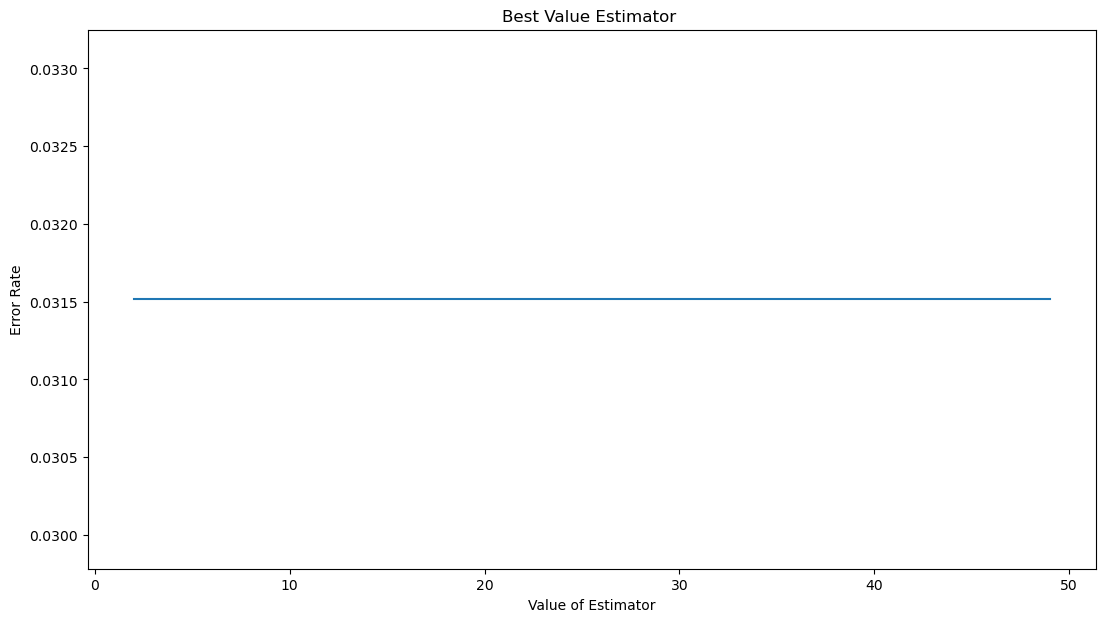

In [73]:
plt.figure(figsize=(13,7))
plt.plot(range(2,50),error)
plt.title('Best Value Estimator ')
plt.xlabel('Value of Estimator')
plt.ylabel('Error Rate')
plt.show()